<a href="https://colab.research.google.com/github/liah12345/Emerging-Markets-Billionaires/blob/main/Billionaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Imported Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
# Reading the Dataset
Billionaires = pd.read_csv('/content/drive/MyDrive/LD7186ASSIGNMENT/billionaires.csv', skipinitialspace = True)
Billionaires.head(10)
Billionaires.columns


Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
Billionaires.isnull().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [152]:
# Renamed Column names
Billionaires.rename(columns={'company.founded': 'Companyfounded', 'company.name': 'Companyname' , 'company.relationship' : 'Companyrelationship' , 'company.sector' : 'Companysector' ,'company.type':
'Companytype' ,'demographics.age': 'Demographicsage' , 'demographics.gender': 'Demographicsgender' ,'location.citizenship':
'Locationcitizenship' ,'location.region':'Locationregion', 'wealth.type':'Wealthtype',  'wealth.worth in billions':
'Wealthworth in billions','wealth.how.category':'Wealthhowcategory' , 'wealth.how.industry':'Wealthhowindustry' ,
'wealth.how.from emerging':'Wealthhowfromemerging', 'wealth.how.inherited': 'Wealthhowinherited', 'wealth.how.was founder':'Wealthhowwasfounder',
'wealth.how.was political':'Wealthhowwaspolitical','location.country code': 'Locationcountry code','location.gdp':
'Locationgdp', 'name':'Name','rank':'Rank', 'year':'Year'}, inplace=True)

In [153]:
Billionaires.columns

Index(['Name', 'Rank', 'Year', 'Companyfounded', 'Companyname',
       'Companyrelationship', 'Companysector', 'Companytype',
       'Demographicsage', 'Demographicsgender', 'Locationcitizenship',
       'Locationcountry code', 'Locationgdp', 'Locationregion', 'Wealthtype',
       'Wealthworth in billions', 'Wealthhowcategory', 'Wealthhowfromemerging',
       'Wealthhowindustry', 'Wealthhowinherited', 'Wealthhowwasfounder',
       'Wealthhowwaspolitical'],
      dtype='object')

In [10]:
Billionaires['Demographicsage'].unique()

array([ 40,  45,  58,  65,  70,  74,   0,  48,  77,  68,  56,  83,  71,
        69,  44,  78,  73,  67,  53,  61,  55,  80,  57,  59,  52,  81,
        66,  91,  43,  64,  72,  50,  51,  85,  29,  88,  94,  86,  35,
        36,  84,  39,  82,  62,  63,  76,  60,  47,  38,  49,  75,  90,
        42,  79,  46,  41,  54,  33,  87,  89,  37,  92,  30,  34,  28,
        32,  31, -42,  12,  96,  -7,  21,  24,  93,  98,  95])

In [11]:
# Replaced the wrong values in age with mean
data2 = Billionaires[Billionaires['Demographicsage'] != 0]
meanDf = Billionaires['Demographicsage'].mean()
print(meanDf)


53.34123947972456


In [12]:
Billionaires['Demographicsage'] = Billionaires['Demographicsage'].replace({-7:53})
Billionaires['Demographicsage'] = Billionaires['Demographicsage'].replace({-42:53})

In [13]:
data2.dtypes

Name                        object
Rank                         int64
Year                         int64
Companyfounded               int64
Companyname                 object
Companyrelationship         object
Companysector               object
Companytype                 object
Demographicsage              int64
Demographicsgender          object
Locationcitizenship         object
Locationcountry code        object
Locationgdp                float64
Locationregion              object
Wealthtype                  object
Wealthworth in billions    float64
Wealthhowcategory           object
Wealthhowfromemerging         bool
Wealthhowindustry           object
Wealthhowinherited          object
Wealthhowwasfounder           bool
Wealthhowwaspolitical         bool
dtype: object

In [14]:
# Age Groups
data2['Demographicsage'] = pd.cut(data2['Demographicsage'], bins = [0, 10, 20, 30, 40 , 50 , 60 , 70, 80 ,90, 100],
include_lowest = True, labels = ['1-10', '11-20', '21-30', '31-40', '41-50','51-60','61-70','71-80','81-90','91-100'])
data2.head()

,Name,Rank,Year,Companyfounded,Companyname,Companyrelationship,Companysector,Companytype,Demographicsage,Demographicsgender,...,Locationgdp,Locationregion,Wealthtype,Wealthworth in billions,Wealthhowcategory,Wealthhowfromemerging,Wealthhowindustry,Wealthhowinherited,Wealthhowwasfounder,Wealthhowwaspolitical
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,31-40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,41-50,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,51-60,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,61-70,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,61-70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


**Billioanire Age Groups**

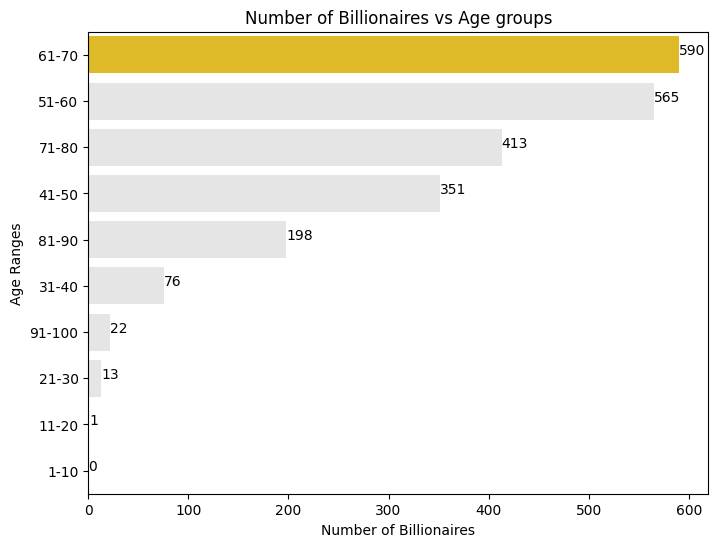

In [15]:
# Plotting age groups
ages=data2["Demographicsage"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,6), dpi=100)
chart = sns.countplot(data=data2, y="Demographicsage", order=ages.index,  palette=['#fccb0a','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5'])
for index, value in enumerate(ages.values.tolist()):
  plt.text(value, index, str(value))
  #plt.grid(which='major', color='#F0F0F0')
  #plt.minorticks_on()
plt.title("Number of Billionaires vs Age groups")
plt.ylabel("Age Ranges")
plt.xlabel("Number of Billionaires")
plt.show()

Maximum billionaires are in the age group of 61 – 70. And minimum number of billionaires in the age group of below 30.

**Data Preprocessing**

In [155]:
#Replaced North/Latin America as America and East/South Asia as Asia , Middle East/North Africa and Sub-Saharan Africa as Africa
Billionaires['Locationregion'] = Billionaires['Locationregion'].replace(['North America' ,'Latin America','0'], 'America')
Billionaires['Locationregion'] = Billionaires['Locationregion'].replace(['East Asia','South Asia'], 'Asia')
Billionaires['Locationregion'] = Billionaires['Locationregion'].replace(['Middle East/North Africa', 'Sub-Saharan Africa'],'Africa')

In [156]:
Billionaires['Locationregion'].unique()

array(['America', 'Europe', 'Asia', 'Africa'], dtype=object)

In [157]:
# The Advanced Countries category includes the high-income OECD members,United States, Canada, Western European countries, Australia, New Zealand, Japan, and Korea.
# All other countries are included in Emerging Markets
Billionaires['Locationcitizenship'] = Billionaires['Locationcitizenship'].replace(['Italy','United States','Japan','Canada','New Zealand','South Korea',
'Australia','United Kingdom','Sweden' ,'Germany','Switzerland','France','Austria','Belgium','Monaco','Norway','Netherlands','Spain','Finland','Denmark',
'Egypt','Greece','Guernsey','Ireland','Portugal'],'Advanced Countries')
Billionaires['Locationcitizenship'] = Billionaires['Locationcitizenship'].replace(['Mexico', 'Hong Kong', 'Taiwan','Saudi Arabia', 'Philippines', 'Indonesia',
'Malaysia','Singapore', 'Nigeria', 'Brazil', 'Russia', 'India', 'Thailand','Kuwait', 'Turkey', 'Chile', 'Venezuela', 'China', 'Argentina','Colombia', 'Cyprus',
'South Africa', 'Ukraine', 'Czech Republic','Israel', 'Lebanon', 'Bermuda', 'United Arab Emirates', 'Georgia','Liechtenstein', 'Ecuador', 'Bahrain', 'Peru',
'Angola', 'Swaziland','Poland', 'Algeria', 'Morocco', 'Kazakhstan', 'Macau', 'Vietnam','Romania', 'St. Kitts and Nevis',
'Oman', 'Nepal', 'Uganda','Lithuania', 'Tanzania'], 'Emerging Markets')


In [158]:
Billionaires['Locationcitizenship'].unique()

array(['Advanced Countries', 'Emerging Markets'], dtype=object)

In [159]:
#Replaced blanks in Demographics gender with names containing family as Family
Billionaires.loc[Billionaires['Name'].str.contains('families'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('family'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('famle'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('Family'), 'Demographicsgender'] = 'Family'

In [160]:
# Replaced male as Male and female as Female
Billionaires['Demographicsgender'] = Billionaires['Demographicsgender'].replace({'male':'Male'})
Billionaires['Demographicsgender'] = Billionaires['Demographicsgender'].replace({'female':'Female'})
Billionaires['Demographicsgender'] = Billionaires['Demographicsgender'].replace({'married couple':'Married Couple'})

In [161]:
Billionaires['Demographicsgender'].unique()

array(['Male', nan, 'Female', 'Family', 'Married Couple'], dtype=object)

In [162]:
# Inherited Vs Selfmade wealth in 1996 , 2001 , 2014 in Advanced countries and Emerging markets
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'founder non-finance':'Founder Non-Finance'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'privatized and resources':'Privatized and Resources'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'self-made finance':'Self-made Finance'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'executive':'Executive'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'inherited':'Inherited'})


In [24]:
#Combined founer non-finance , self-made finance , executive,privatized and resources to selfmade
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Founder Non-Finance':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Privatized and Resources':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Self-made Finance':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Executive':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Inherited':'Inherited'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Selfmade':'Selfmade'})

In [119]:
Billionaires['Wealthtype'].unique()

array(['Selfmade', 'Inherited', 'nan'], dtype=object)

In [164]:
#Combined new,neew to New and cleaned the data
Billionaires['Companytype'] = Billionaires['Companytype'].replace(['new','new, privitization','new/aquired','new division','neew','new '],'New')
Billionaires['Companytype'] = Billionaires['Companytype'].replace(['aquired','acquired'],'Acquired')
Billionaires['Companytype'] = Billionaires['Companytype'].replace(['privatization','privatized'],'Privatized')
Billionaires['Companytype'] = Billionaires['Companytype'].replace(['franchise rights','franchise'],'Franchise')
Billionaires['Companytype'] = Billionaires['Companytype'].replace(['state owned enterprise', 'joint venture','subsidiary', 'merger'],'Others')

In [165]:
Billionaires['Companytype'].unique()

array(['New', 'Privatized', 'Acquired', nan, 'Others', 'Franchise'],
      dtype=object)

In [166]:
# Combined and replaced Companysectors based on The Global Industry Classification Standard (GICS)
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['media','publishing','satallite communications','telecom/investments','video technology','advertising','electonics components','telecommunications','mobile app',
'mobile phone batteries','mobile phones','telecom, finance','movies','music','media, pipelines','networking equipment','security and surveillance technology','pachinko','telecom','telecom, oil, beer','telecomm',
'media, exports','web broadcasting','wireless products','wrestling promotion','fiber optic cables','antennas','entertainment','broadcasting',' Communications','cell phones','film','GPS technology',
'animation','Communications'],'Communication Services')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['retail','electronics','hotels','cleaning supplies','cars','hospitality','jeans','Fashion','clothing ',' retail','restaurant','luxury goods','restaurants','casinos','consumer goods','truck stops','manufacturing',
'retail, home appliances','roller bearings','shoes','fashion/oil','gambing','apparel',' fashion','fashion retail','clothing','jewelry','tires','shopping centers','motorcycles',
'movie theatres','watches','kitchen appliances','sewing machines','shoe retail','sporting goods','Star Wars','supermarkets''oil tankers',
'oil, railroad, investments','textiles','toys','vacuum cleaners','laptops','luxury fashion''laundry soap','mail order retail','sports retail','food retail','sportswear','sugar, flour, cement','winter jackets',
'wool','leather','television','textiles, industrial goods, media','tire manufacturing','property, textile manufacturing','tractors','uniforms','rental cars','watch retail',
'locomotive manufacturing','zippers','autos','auto dealerships','heating systems','education, language schools','aplliances','furniture','automotive components','automotives','auto parts',
' casinos','apparel and eyewear','bicycles','hardware stores','e-commerce, venture capital','brake systems','auto components','braking systems','cable','cameras''cans',
'auto sales, energy','cars, finance','automotive''apparel retail','appliances','hospitality and food service','hotels and supermarkets','industrial goods','cleaning products',
'e-commerce','education','electonics','electric motors','electronic componants','commercial pilot training','commodities','ethanol','auto engines','auto glass''computer parts',
'computers','auto repair','auto retail','footwear','automobile dealers','art dealing','automobiles','greeting cards','cork''air compressors','automotive parts','auto glass', 'automotive'
'cotton yarn','home furnishings','diamond jewelry','diamonds','domestic appliances','consumer retail', 'automotive','Consumer '],'Consumer Discretionary')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['soup','beer','cosmetics','food processing/commodities','commodities (wheat, oil, shipping)','groceries','candy','makeup','food packaging','coffee','spirits','snack foods',
'postal service, beverages','food products''beauty and health care products','alcohol','beverages','cheese','flavorings','agriculture','soft drinks','seeds','milk',
'soy sauce','natural flavors','nutrition supplements','meat processing','tobacco/luxury brands','oleochemicals and palm oil','palm oil','salsa','pet food','cans', 'cork', 'supermarkets',
'wine and spirits','yogurt','meat products','tobacco','tortillas','liquor','wine','food production','banannas','beer and food distribution','fashion''beauty and health care products',
'food manufacturing','food, entertainment','beverages and food','grain','bottled water','brewery','food and energy processess','food processing','fashion','luxury fashion'
'food retail','catering','chocolate and coffee','chocolates','cigarette','cigarettes','infant formula','agribusiness','agriculteral','cotton yarn','commodities (sugar, cement flour)','agricultural products',
'comodities','confectionary','food','food distribution','aigriculture','food sweeteners','luxury fashion','food products', 'laundry soap','frozen foods','gum','animal feed','drinks','dairy','dairy products','beauty and health care products', 'apparel retail'],'Consumer Staples')

In [167]:
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['natural gas','petrochemicals','energy, retail, manufacturing','oil','oil and gas','gas, petrochemicals','  Oil refining','oil and natural gas',
'oil exploration equipment','oil field services','oil infrastructure','oil refining','oil services','oil trading','oil/investments','oil/telecommunications',
'oilfield equipment','oilfield services','wind energy','shale','petrochemicals and textiles','petrochemicals, textiles','petroleum','gas','energy',' Oil refining','gas pipeline','cogeneration',
'energy (coal, oil and gas)','gas and propane','Oil refining','oil tankers'],'Energy')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['real estate','property development','self storage','lumber, real estate','self-storage','palm oil/real estate','pet supplies, real estate','manufacturing, real estate, aviation',
'real estate (shopping malls)','real estate and metals','real estate, financial services and computers','real estate, retail','real estate/banking',
'real estate/sports teams','golf courses','infrastructure'],'Real Estate')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['paper','mining','mining, banking','metals, paper, cement','steel','chemicals','timber and paper','forestry and mining','metals and mining','steel ','metals/banking',
'mettallurgy','mining, investments','mining, steel','metals','timber','lumber','steel/oil','timber, plantations','paint','rice trading, mining, infrastructure','palm oil, mining','paper manufacturing/investment',
'paper products','plastic','plastics','polymers','steel/banking','iron','iron and steel','iron ore','precious metals','glass','fertilizer','building materials',
'home building materials','coal','fertilizers','glasses','copper, poultry','copper/mining','aluminum','aluminum, oil','copper'],'Materials')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['utilities','solar energy','electricity'],'Utilities')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['technology','gaming','software','internet company','video games','IT Consulting','staffing company','new technology','online gaming','outsourcing','pachinko gaming machines',
'semiconductors','social network','printers','internet service provider','industrial software','electronic interconnectors','gambling software',' Software',
' technology','healthcare IT','cloud computing','computer services','financial information','internet companies','internet provider','data processing',
'data storage','information services','internet','internet domain and web hosting','internet service company','Software'],'Information Technology')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['pharmaceuticals','medical supplies','healthcare management','medical technology','hair care products','eyeglasses','hair care','laboratory services','medical devices',
'medical equipment','biopharmaceutical','biotech','biotech investing','hair care products ','hair care products/tequila','healthcare','hospitals',
'dental implants','diapers','drug stores'],'Healthcare')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['banking','investment banking','trade investment',' Finance','utilities/financial services','invetsments','investment','insurance','trade fairs','investment banking/beer','service assurance instruments',
'money management','mortgage banking','mortgages','stock brokerage','mutal funds','mutual funds','risk management','investment mangagment',
'investments/real estate, sports teams','trading','investments','small-company lending','investment (via holding company)','stock broker','private equity','private investment company','leveraged buyout',
'leveraged buyouts','life insurance','venture capitalist','life insurance ','retail, financial services, real estate','bank','banking and insurance','banking and real estate','banking, media',
'banking, oil, aluminum','banking, real estate','banking/insurance','banking/publishing','finance ','hedge funds','brokerage/banking','finace','financial services','commodities trading','commodity trading',
'finance','asset management','credit cards','insurancei, power','holding company','industrial manufacturing and banking','diversified investments','currency trading',
'consumer loans','Finance','Banking'],'Financials')
Billionaires['Companysector'] = Billionaires['Companysector'].replace(['construction','transportation','shipping','construction,banking','cement','roofing','landscape architecture','security','toll roads','trucking ','elevators','logistics','microchips',
'shipbuilding','sports equipment','measuring instruments','trucking','tools','sports team','technology publishing','truck stop','trucking and logistics','waste management',
'logging','screws','security ','cameras','security equipment','payroll processing','payroll processing ','sewage treatment','lawsuits','manufacturing (agriculture, steel, electronics)',
'pipelines','pipes','sports','staffing services','port','mass transit','port containers','port logistics','ports, gas','supply chain','technology consulting',
'printing and electronics','processing machinary','racing','trading company','travel company','relocation services','linear actuators','power engineering',
'printing','industrial automation','aviation','express delivery services','flooring','home improvement retail','airline','hostile takeovers','boats',
'bridge to canada','airplanes','business centers','heavy equiptment (excavators, backhoes and tractors)','aerospace and defense','architectural products',
'aircraft leasing','elevators, escalators, engineering','engineering','fertalizers','construcion','armaments','airport','construction, hotels, gaming','airport maintenance',
'construction, utilities','construction/insurance','construction/real estate','construction/real estate/banking','airports','cranes','cruises','heavy equipment',
'heavy manufacturing','HR consulting','industrial equipment','air compressors','industrial tools','computer parts'],
'Indusrials')

In [168]:
Billionaires['Companysector'].unique()

array(['Information Technology', 'Financials', 'Communication Services',
       'Healthcare', 'Consumer Discretionary', 'Real Estate',
       'Consumer Staples', 'Indusrials', 'Energy', nan, 'Materials',
       'Utilities'], dtype=object)

In [169]:
# Replaced and cleaned Wealthtype column
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace(['Technology-Medical'],
                                                                              'Technology (Non Computers)')
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace(['Real Estate','Constrution'],
                                                                              'Real Estate')
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace(['Diversified financial',
                                                                               'Money Management','Hedge funds','banking','Venture Capital','Private equity/leveraged buyout'],'Banking and Finance')
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Retail, Restaurant':'Retail'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Consumer':'Consumer Goods'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Media':'Media and Entertainment'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Non-consumer industrial':'Non-Consumer Goods'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Technology-Computer':
                                                                               'Technology (Computers)'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Energy':'Energy'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace({'Mining and metals':'Mining'})
Billionaires['Wealthhowindustry'] = Billionaires['Wealthhowindustry'].replace(['Other','services','0'],'Others')


In [170]:
Billionaires['Wealthhowindustry'].unique()

array(['Technology (Computers)', 'Consumer Goods',
       'Media and Entertainment', 'Technology (Non Computers)', 'Retail',
       'Real Estate', 'Banking and Finance', 'Non-Consumer Goods',
       'Energy', 'Mining', 'Others', nan], dtype=object)

In [171]:
#Combined Finance to Financial and energy and Trucking to Resource Related
Billionaires['Wealthhowcategory'] = Billionaires['Wealthhowcategory'].replace({'Finance':'Financial'})
Billionaires['Wealthhowcategory'] = Billionaires['Wealthhowcategory'].replace({'energy':'Resource Related'})
Billionaires['Wealthhowcategory'] = Billionaires['Wealthhowcategory'].replace({'0':'Others'})
Billionaires['Wealthhowcategory'] = Billionaires['Wealthhowcategory'].replace({'nan':'Others'})
Billionaires['Wealthhowcategory'] = Billionaires['Wealthhowcategory'].replace({'Trucking':'Resource Related'})

In [172]:
Billionaires['Wealthhowcategory'].unique()

array(['New Sectors', 'Traded Sectors', 'Non-Traded Sectors', 'Financial',
       'Resource Related', 'Others', nan], dtype=object)

In [173]:
# Cleaned and grouped using Replace command
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['investor ','partner','investor'],'Investor')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['Honorary President for Life','president','president and ceo','president'],'President')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['lawer','lawyer'],'Lawyer')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['relation/vice chairman','co-chairman','vice-chairman','vice chairman'],'Vice Chairman')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace({'employee':'Employee'})
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace({'shareholder':'Share holder'})
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['supervisory board or directors','co-director of zinc, copper and lead','Exectuitve Director','inherited','director','general director'],'Director')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['relation','Relation','relative'],'Relation')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(["head of Microsoft's application software group",'Chairman/founder','founder, chairwoman, ceo','founder and ceo','founder, chairman, ceo','founder and chairman','founder, chairman, ceo','founder/CEO','founder/chairman','founder','founder and CEO','founder CEO owner','founder and executive vice chairman','founder, chairman','founder and chairwoman','founder/president','inventor','founder','founder/relation','chairwoman, ceo','founder and executive chairman','founder/vice chairman'],'Founder')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['Chief Executive','relation and ceo','former CEO','investor and  CEO','CEO','ceo',],'CEO')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['Global Head of Real Estate','Head of Board of Directors','head of high-yield bond trading dept','leadership'],'Leader')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['Vice President of Infrastructure Software','Vice President'],'Vice President')
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace({'COO':'COO'})
Billionaires['Companyrelationship'] = Billionaires['Companyrelationship'].replace(['former chairman and CEO','executive chairman','relation and chairman','investor/founder','chairman of management committee','Chairman and Chief Executive Officer','owner','chairman','chairman of the board','owner and vice chair','chairwomen','chairman and ceo','deputy chairman','owner and former CEO','Chairman, CEO','chariman','Chairman/shareholder'],'Chairman')


In [174]:
Billionaires['Companyrelationship'].unique()

array(['Founder', nan, 'Relation', 'CEO', 'Chairman', 'Investor',
       'Director', 'President', 'Vice President', 'Vice Chairman',
       'Lawyer', 'Employee', 'Share holder', 'Leader', 'COO'],
      dtype=object)

**Differentiating Self-Made from Inherited Wealth **

Billionaire on the dataset was analyzed whether their source of wealth was self-made or by inheritance. The four subgroups of self-made billionaires are founders, executives, financiers, and resource and politically connected (Privatized and Resources) billionaires


**Source of Wealth in Emerging Markets**

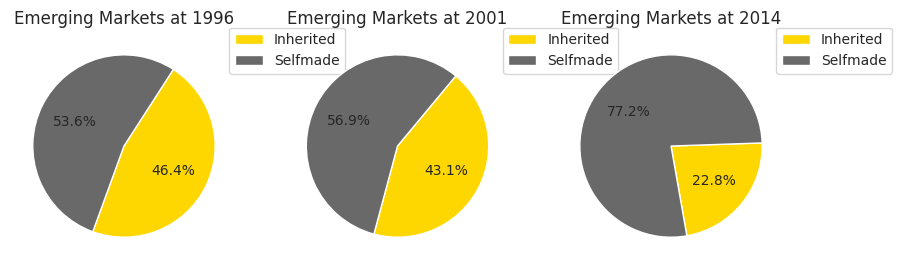

In [146]:
# Source of Wealth in Emerging Markets at 1996
Billionaires[Billionaires['Demographicsage']!= 0]
data2 = Billionaires[Billionaires['Year'] ==1996]
data2 = Billionaires[Billionaires['Year'] ==1996]
data3 = data2[data2['Locationcitizenship'] == 'Emerging Markets']
data3 = data3[data3['Wealthtype']!= 'nan']
pie = data3[['Wealthtype','Wealthworth in billions']]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
data10 = pie.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[0].pie(data10['Wealthworth in billions'], startangle = 250 ,autopct = '%1.1f%%', colors= colors_list,  frame = False)
axs[0].set_title('Emerging Markets at 1996')
axs[0].legend(data10.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')
# Source of Wealth in  Emerging Markets at 2001
data4 = Billionaires[Billionaires['Year'] ==2001]
data5 = data4[data4['Locationcitizenship'] == 'Emerging Markets']
pie1 = data5[['Wealthtype','Wealthworth in billions']]
data1 = pie1.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[1].pie(data1['Wealthworth in billions'], startangle = 255 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[1].set_title('Emerging Markets at 2001')
axs[1].legend(data1.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')

# Source of Wealth in Emerging Markets at 2014
data6 = Billionaires[Billionaires['Year'] ==2014]
data7 = data6[data6['Locationcitizenship'] == 'Emerging Markets']
data7 = data7[data7['Wealthtype']!= 'nan']
pie2 = data7[['Wealthtype','Wealthworth in billions']]
data2 = pie2.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[2].pie(data2['Wealthworth in billions'], startangle = 280 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[2].set_title('Emerging Markets at 2014')
axs[2].legend(data2.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')
plt.show()

**Source of Wealth in  Advanced Countries **

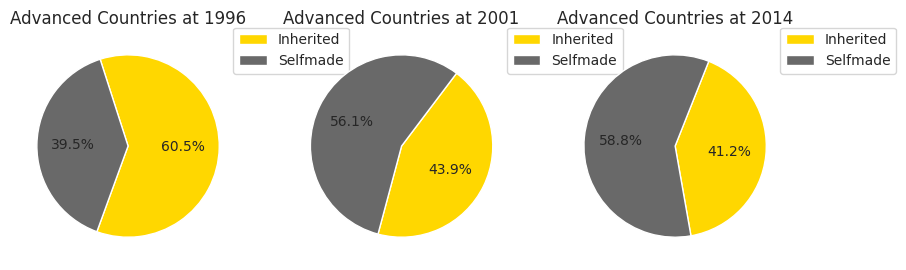

In [148]:
# Source of Wealth in Advanced Countries at 1996
data2 = Billionaires[Billionaires['Year'] ==1996]
data2 = Billionaires[Billionaires['Year'] ==1996]
data3 = data2[data2['Locationcitizenship'] == 'Advanced Countries']
data3 = data3[data3['Wealthtype']!= 'nan']
pie = data3[['Wealthtype','Wealthworth in billions']]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
data10 = pie.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[0].pie(data10['Wealthworth in billions'], startangle = 250 ,autopct = '%1.1f%%', colors= colors_list,  frame = False)
axs[0].set_title('Advanced Countries at 1996')
axs[0].legend(data10.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')

# Source of Wealth in Advanced Countries at 2001
data4 = Billionaires[Billionaires['Year'] ==2001]
data5 = data4[data4['Locationcitizenship'] == 'Advanced Countries']
data5 = data5[data5['Wealthtype']!= 'nan']
pie1 = data5[['Wealthtype','Wealthworth in billions']]
data1 = pie1.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[1].pie(data1['Wealthworth in billions'], startangle = 255 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[1].set_title('Advanced Countries at 2001')
axs[1].legend(data1.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')

# Source of Wealth in Advanced Countries at 2014
data6 = Billionaires[Billionaires['Year'] ==2014]
data7 = data6[data6['Locationcitizenship'] == 'Advanced Countries']
data7 = data7[data7['Wealthtype']!= 'nan']
pie2 = data7[['Wealthtype','Wealthworth in billions']]
data2 = pie2.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gold', 'dimgray', 'orange', 'Maroon']
axs[2].pie(data2['Wealthworth in billions'], startangle = 280 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[2].set_title('Advanced Countries at 2014')
axs[2].legend(data2.index,bbox_to_anchor=(1.5,1.05),loc = 'upper right')
plt.show()

** Inherited and types of Self-made wealth among billionaires in 1996, 2001, 2014**

In [44]:
#Combined founer non-finance , self-made finance , executive,privatized and resources to selfmade
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'founder non-finance':'Founder Non-Finance'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'privatized and resources':'Privatized and Resources'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'self-made finance':'Self-made Finance'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'executive':'Executive'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'inherited':'Inherited'})


**Source of Wealth And Types of Selfmade Wealth in  Advanced Coutries at 1996**

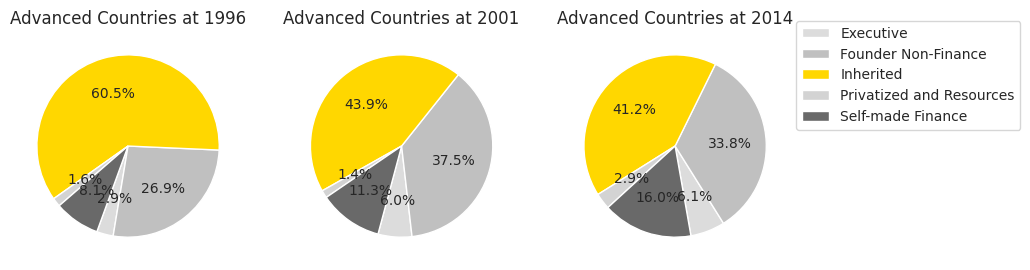

In [202]:
# Source of Wealth in Advanced Countries at 1996
data2 = Billionaires[Billionaires['Year'] ==1996]
data2 = Billionaires[Billionaires['Year'] ==1996]
data3 = data2[data2['Locationcitizenship'] == 'Advanced Countries']
data3 = data3[data3['Wealthtype']!= 'nan']
pie = data3[['Wealthtype','Wealthworth in billions']]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
data10 = pie.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[0].pie(data10['Wealthworth in billions'], startangle = 250 ,autopct = '%1.1f%%', colors= colors_list,  frame = False)
axs[0].set_title('Advanced Countries at 1996')

# Source of Wealth in Advanced Countries at 2001
data4 = Billionaires[Billionaires['Year'] ==2001]
data5 = data4[data4['Locationcitizenship'] == 'Advanced Countries']
data5 = data5[data5['Wealthtype']!= 'nan']
pie1 = data5[['Wealthtype','Wealthworth in billions']]
data1 = pie1.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[1].pie(data1['Wealthworth in billions'], startangle = 255 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[1].set_title('Advanced Countries at 2001')

# Source of Wealth in Advanced Countries at 2014
data6 = Billionaires[Billionaires['Year'] ==2014]
data7 = data6[data6['Locationcitizenship'] == 'Advanced Countries']
data7 = data7[data7['Wealthtype']!= 'nan']
pie2 = data7[['Wealthtype','Wealthworth in billions']]
data2 = pie2.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[2].pie(data2['Wealthworth in billions'], startangle = 280 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[2].set_title('Advanced Countries at 2014')
axs[2].legend(data2.index,bbox_to_anchor=(1.0,1.08),loc = 'best')
plt.show()

**Source of Wealth And Types of Selfmade Wealth in Emerging Markets**

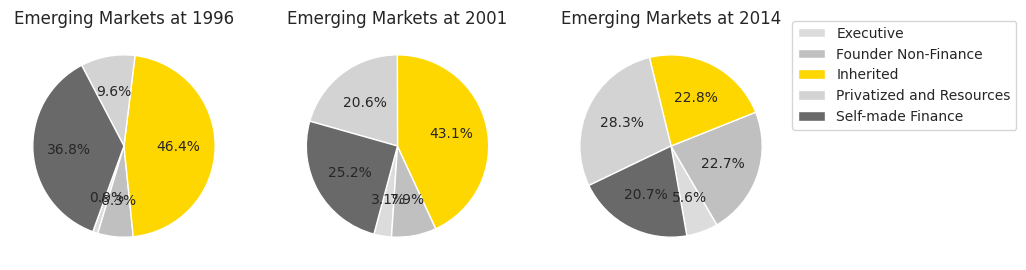

In [201]:
# Source of Wealth in Emerging Markets at 1996
Billionaires[Billionaires['Demographicsage']!= 0]
data2 = Billionaires[Billionaires['Year'] ==1996]
data2 = Billionaires[Billionaires['Year'] ==1996]
data3 = data2[data2['Locationcitizenship'] == 'Emerging Markets']
data3 = data3[data3['Wealthtype']!= 'nan']
pie = data3[['Wealthtype','Wealthworth in billions']]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
data10 = pie.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[0].pie(data10['Wealthworth in billions'], startangle = 250 ,autopct = '%1.1f%%', colors= colors_list,  frame = False)
axs[0].set_title('Emerging Markets at 1996')

# Source of Wealth in  Emerging Markets at 2001
data4 = Billionaires[Billionaires['Year'] ==2001]
data5 = data4[data4['Locationcitizenship'] == 'Emerging Markets']
pie1 = data5[['Wealthtype','Wealthworth in billions']]
data1 = pie1.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[1].pie(data1['Wealthworth in billions'], startangle = 255 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[1].set_title('Emerging Markets at 2001')


# Source of Wealth in Emerging Markets at 2014
data6 = Billionaires[Billionaires['Year'] ==2014]
data7 = data6[data6['Locationcitizenship'] == 'Emerging Markets']
data7 = data7[data7['Wealthtype']!= 'nan']
pie2 = data7[['Wealthtype','Wealthworth in billions']]
data2 = pie2.groupby('Wealthtype')[['Wealthworth in billions']].sum()
colors_list = ['gainsboro', 'silver', 'gold', 'lightgrey','dimgrey']
axs[2].pie(data2['Wealthworth in billions'], startangle = 280 ,autopct = '%1.1f%%', colors= colors_list, frame = False)
axs[2].set_title('Emerging Markets at 2014')
axs[2].legend(data2.index,bbox_to_anchor=(1.0,1.08),loc = 'best')
plt.show()

The percentage of company founders and executives among self-made billionaires in emerging markets is increasing incredibly quickly, while the percentage of inherited wealth is decreasing.The percentage of company founders and executives among self-made billionaires in emerging markets is increasing incredibly quickly, while the percentage of inherited wealth is decreasing.

In [51]:
Billionaires['Demographicsgender'].unique()

array(['Male', nan, 'Female', 'Family', 'Married Couple'], dtype=object)

**Women Billionaires in Emerging Markets**

In [52]:
# Replaced blanks in Demographics gender with names containing family as Family
Billionaires.loc[Billionaires['Name'].str.contains('families'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('family'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('famle'), 'Demographicsgender'] = 'Family'
Billionaires.loc[Billionaires['Name'].str.contains('Family'), 'Demographicsgender'] = 'Family'

In [204]:
#Combined founer non-finance , self-made finance , executive,privatized and resources to selfmade
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Founder Non-Finance':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Privatized and Resources':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Self-made Finance':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Executive':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Inherited':'Inherited'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Selfmade':'Selfmade'})

In [54]:
Billionaires['Wealthtype'].unique()

array(['Selfmade', 'Inherited', nan], dtype=object)

In [205]:
# Gender differences and Source of wealth across Advanced Countries and Emerging Markets
data3 = Billionaires[Billionaires['Demographicsgender'] != 'Others']
data4 = data3[data3['Demographicsgender'] != 'Family']
data5 = data4[data4['Demographicsgender'] != 'Married Couple']
data6 = data5[data5['Locationcitizenship'] == 'Emerging Markets']
df8 = pd.pivot_table(data6,index = 'Wealthtype',columns = 'Demographicsgender',values = 'Wealthworth in billions',aggfunc = sum)
df8.head()

Demographicsgender,Female,Male
Wealthtype,,
Inherited,120.5,658.4
Selfmade,34.8,2061.5


In [208]:
# Gender differences and Source of wealth across Advanced Countries and Emerging Markets
data3 = Billionaires[Billionaires['Demographicsgender'] != 'Others']
data4 = data3[data3['Demographicsgender'] != 'Family']
data5 = data4[data4['Demographicsgender'] != 'Married Couple']
data9 = data5[data5['Locationcitizenship'] == 'Advanced Countries']
df10 = pd.pivot_table(data9,index = 'Wealthtype',columns = 'Demographicsgender',values = 'Wealthworth in billions',aggfunc = sum)
df10.head()

Demographicsgender,Female,Male
Wealthtype,,
Inherited,733.1,1969.2
Selfmade,61.5,3473.7


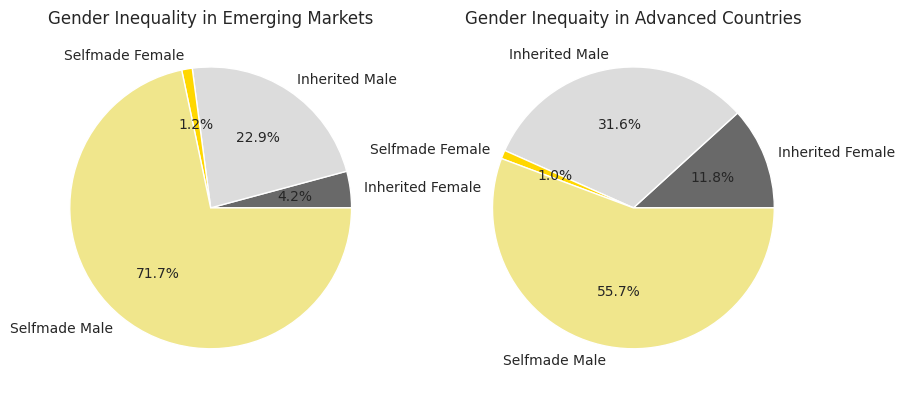

In [211]:
s = df8.stack()
s1 = df10.stack()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
colors_list = ['dimgrey', 'gainsboro', 'gold', 'khaki']
axs[0].pie(s, labels=["{0} {1}".format(l1, l2) for l1, l2 in s.index],
autopct='%1.1f%%', colors = colors_list)
axs[0].set_title('Gender Inequality in Emerging Markets')
axs[1].pie(s1, labels=["{0} {1}".format(l1, l2) for l1, l2 in s1.index],
autopct='%1.1f%%', colors = colors_list)
axs[1].set_title('Gender Inequaity in Advanced Countries')
plt.show()

In emerging markets, women made up less than 2% of self-made billionaires. In advanced countries, self-made women billionaires are equally rare and make up less than 3% of the overall population.

In [57]:
#Combined founer non-finance , self-made finance , executive,privatized and resources to selfmade
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Founder Non-Finance': 'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'Privatized and Resources' : 'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'self-made finance':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'executive':'Selfmade'})
Billionaires['Wealthtype'] = Billionaires['Wealthtype'].replace({'inherited':'Inherited'})


In [58]:
Billionaires['Wealthtype'].unique()

array(['Selfmade', 'Inherited', nan], dtype=object)

**Billionaires by Company Relationship**

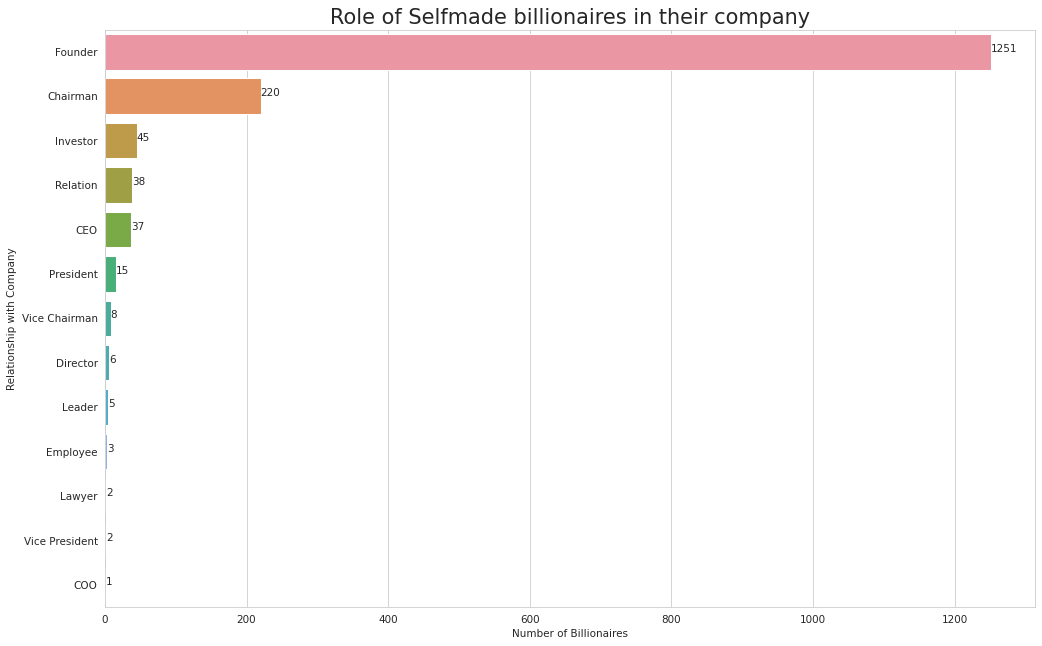

In [59]:
#Selfmade Founders
data2 = Billionaires[Billionaires['Wealthtype'] == 'Selfmade']
industry=data2.groupby("Companyrelationship")["Name"].count().sort_values(ascending=False)
plt.figure(figsize=(16,10), dpi=75)
sns.set_style("whitegrid")
chart = sns.countplot(data=data2, y="Companyrelationship", order=industry.index )
for index, value in enumerate(industry.values.tolist()):
  plt.text(value, index, str(value))
plt.title("Role of Selfmade billionaires in their company" , fontsize = 20)
plt.ylabel("Relationship with Company")
plt.xlabel("Number of Billionaires")
plt.show()

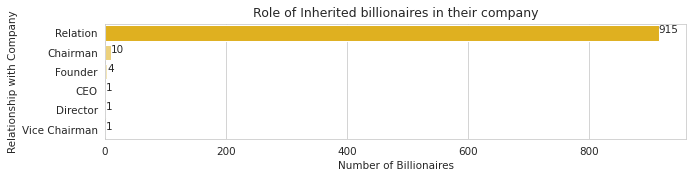

In [60]:
# Inherited Founders
data2 = Billionaires[Billionaires['Wealthtype']!= 'nan']
data2 = Billionaires[Billionaires['Wealthtype'] == 'Inherited']
industry=data2.groupby("Companyrelationship")["Name"].count().sort_values(ascending=False )
plt.figure(figsize=(10,2), dpi=75)
sns.set_style("whitegrid")
chart = sns.countplot(data=data2, y="Companyrelationship", order=industry.index , palette=['#FFC000','#FFDB69','#FFEBAB','#FFF6D9'] )
for index, value in enumerate(industry.values.tolist()):
  plt.text(value, index, str(value) )
  plt.title("Role of Inherited billionaires in their company")
plt.ylabel("Relationship with Company")
plt.xlabel("Number of Billionaires")
plt.show()

Analyzed the Billionaires company relationship attribute and found Founders are more in Self-made Billionaires and they are playing executive roles. In inherited Billionaires very rare are founders and executives.

**Women Billioanires**

<function matplotlib.pyplot.show(close=None, block=None)>

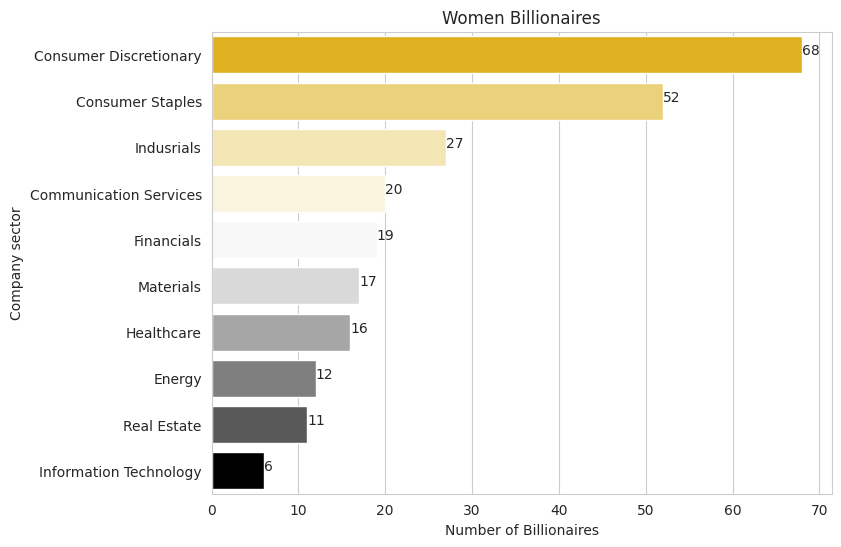

In [61]:
#Women Billionaires
data2 = Billionaires[Billionaires['Demographicsgender'] == 'Female']
industry=data2.groupby("Companysector")["Name"].count().sort_values(ascending=False)
plt.figure(figsize=(8,6), dpi=100)
sns.set_style("whitegrid")
chart = sns.countplot(data=data2, y="Companysector",order=industry.index ,palette=['#FFC000','#FFDB69','#FFEBAB','#FFF6D9','#F8F8F8','#D9D9D9','#A6A6A6','#7F7F7F','#595959','#000000'])
for index, value in enumerate(industry.values.tolist()):
  plt.text(value, index, str(value))
plt.title("Women Billionaires")
plt.ylabel("Company sector")
plt.xlabel("Number of Billionaires")
plt.show



Banking and Finance and Consumer Goods are the successful industrial sectors with highest number of billionaires

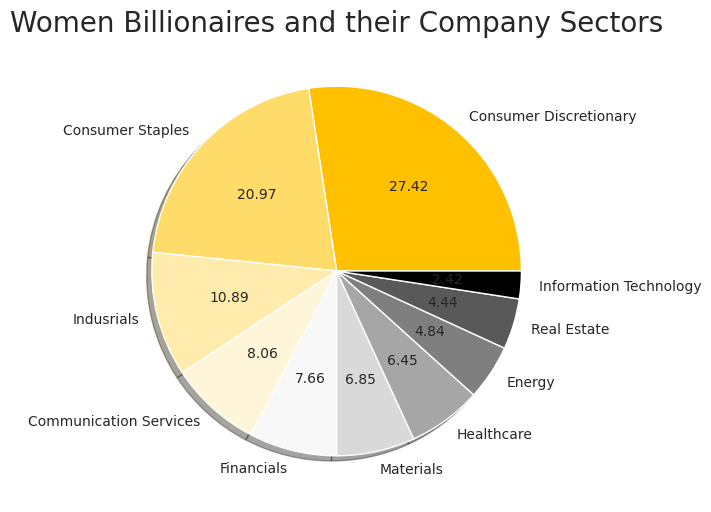

In [62]:
# Women Billionaires
data2 = Billionaires[Billionaires['Demographicsgender'] == 'Female']
data3 = data2['Companysector'].value_counts()
index_source = data3.index
source = data3.values
plt.figure(figsize=(6,6))
#colors_list = ['goldenrod', 'dimgrey' ,'gold', 'palegoldenrod'	,'whitesmoke',	'silver', 'grey',	'black','']
colors_list = ['#FFC000','#FFDB69','#FFEBAB','#FFF6D9','#F8F8F8','#D9D9D9','#A6A6A6','#7F7F7F','#595959','#000000']
plt.pie(source,labels=index_source,autopct='%.2f',colors = colors_list, shadow = True)
plt.gcf()
plt.title("Women Billionaires and their Company Sectors",fontsize=20)
plt.show()


Women become wealthy through inheritance. Women Billionaires are in the sectors traditionally viewed as their domain, such as fashion, retail which comes under Consumer Discretionary and in Consumer Staples (soup, commodities, groceries) and are less common in sectors like Energy (Oil refining, Petro chemicals) that require large start-up investments.

In [63]:
# Billionaires data across years
data1996 = Billionaires[Billionaires['Year']== 1996]
data2001 = Billionaires[Billionaires['Year']== 2001]
data2014 = Billionaires[Billionaires['Year']== 2014]

In [64]:
df4 = pd.pivot_table(data1996,index = 'Locationregion',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)


In [65]:
df5 = pd.pivot_table(data2001,index = 'Locationregion',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)


In [66]:
df6 = pd.pivot_table(data2014,index = 'Locationregion',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)


Text(0, 0.5, 'wealth.worth in billions')

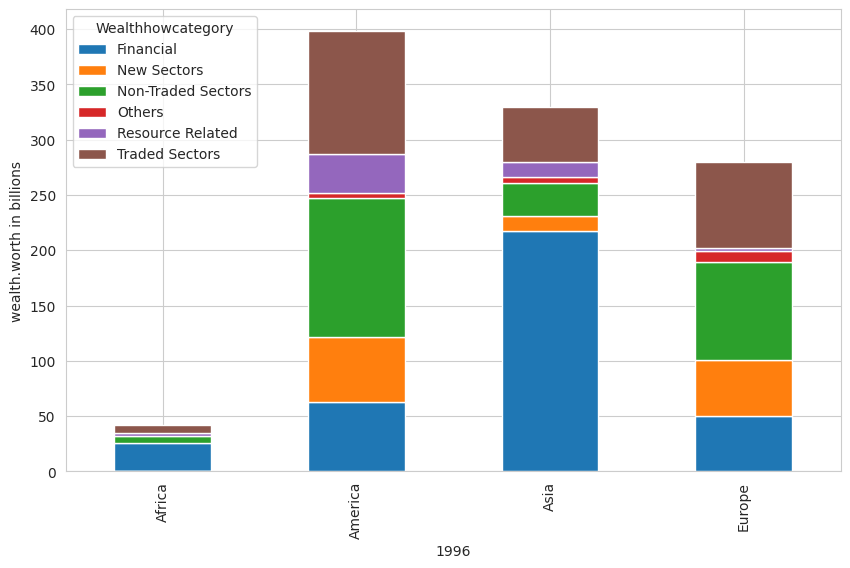

In [67]:
df4.plot(kind = 'bar' , stacked = True , figsize =(10,6))

plt.xlabel('1996')
plt.ylabel('wealth.worth in billions')

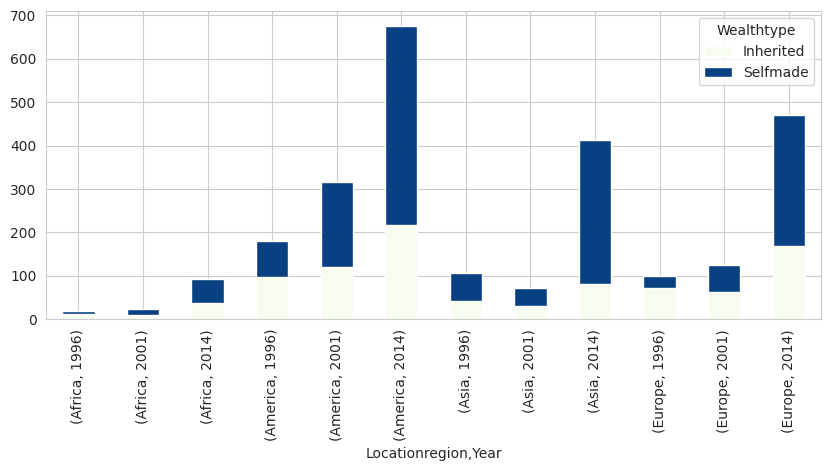

In [68]:
 #colors = plt.cm.GnBu(np.linspace(0, 1, 10))
df_grouped = Billionaires.groupby(['Locationregion','Year','Wealthtype'])['Year'].count()
df_grouped.unstack().plot(kind='bar',stacked=True, colormap="GnBu" ,grid=True, figsize=(10,4));

In [69]:
df4["Name"] = "df4"
df5["Name"] = "df5"
df6["Name"] = "df6"
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "Locationregion"]) # transform in tidy format each df
                   for i in [df4, df5, df6]],
                   ignore_index=True)

In [70]:
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['DF'] = name
    return df

df1 = prep_df(df4, '1996')
df2 = prep_df(df5, '2001')
df3 = prep_df(df6, '2014')

df = pd.concat([df1, df2, df3])

In [71]:
import altair as alt
alt.Chart(df).mark_bar().encode(
    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),
    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title= 'SUM (Wealth worth in Bilions)')),
    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),
    # tell Altair which field to use for color segmentation
    color=alt.Color('DF:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

alt.Chart(...)

Emerging Europe's wealth is steadily shifting from non-tradable to other industries. The distribution of wealth across sectors in Europe has not changed significantly over time.
In Asia Financial sector has overtaken other sectors in 1996. Many financial sector fortunes were destroyed by the Asian financial crisis of 1997. Finance had been replaced by new industries and tradables in developing Asia in 2014.
For American billionaires, the nontraded industries, which collectively accounted for nearly one-third of wealth, captured the highest percentage of billionaire wealth. Over the past ten years, the financial sector has overtaken all others, while most other sectors have contributed to growth with approximately stable shares. The new industries are one exception, which though they expanded a little in 2014, produced less than 2% of the world's extreme wealth.


In [72]:
df4 = pd.pivot_table(data1996,index = 'Locationcitizenship',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)
df5 = pd.pivot_table(data2001,index = 'Locationcitizenship',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)
df6 = pd.pivot_table(data2014,index = 'Locationcitizenship',columns = 'Wealthhowcategory'
,values = 'Wealthworth in billions',aggfunc = sum)

In [73]:
df4["Name"] = "df4"
df5["Name"] = "df5"
df6["Name"] = "df6"
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["Name", "Locationcitizenship"]) # transform in tidy format each df
                   for i in [df4, df5, df6]],
                   ignore_index=True)

In [74]:
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['DF'] = name
    return df

df1 = prep_df(df4, '1996')
df2 = prep_df(df5, '2001')
df3 = prep_df(df6, '2014')

df = pd.concat([df1, df2, df3])

In [75]:
import altair as alt
alt.Chart(df).mark_bar().encode(
    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None),
    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title= 'SUM (Wealth worth in Bilions)')),
    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None),
    # tell Altair which field to use for color segmentation
    color=alt.Color('DF:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#96ceb4', '#ffcc5c','#ff6f69'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0
    )

alt.Chart(...)

**Billionaires by Age**

In [76]:
# Emerging Markets Billionaires
data2 = Billionaires[Billionaires['Demographicsage']!= 0]
df_emerging = data2[data2['Locationcitizenship'] == 'Emerging Markets']

In [77]:
# Advanced Countries Billionaires
data2 = Billionaires[Billionaires['Demographicsage']!= 0]
df_advanced = data2[data2['Locationcitizenship'] == 'Advanced Countries']

In [78]:
# Inherited Billionaires in Emerging Markets
df_emerging_inherited = df_emerging[df_emerging['Wealthtype']== 'Inherited']

In [79]:
# Selfmade Billionaires in Emerging Markets
df_emerging_selfmade = df_emerging[df_emerging['Wealthtype']== 'Selfmade']

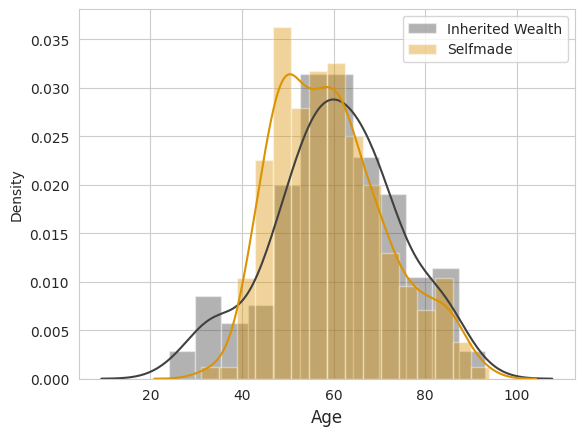

In [80]:
# Inherited vs Selfmade Emerging Markets Billionaires Ages
sns.distplot(df_emerging_inherited[['Demographicsage']], hist=True , color="#404040" ,label='Inherited Wealth')
sns.distplot(df_emerging_selfmade[['Demographicsage']], hist=True , color="#DB9303", label='Selfmade')
sns.set_style("white")
plt.legend(bbox_to_anchor=(1.0,1.0),loc = 'best')
plt.xlabel('Age',fontsize = 12)
plt.show()


Billionaires under 50 outweigh billionaires over 70 in emerging markets. In comparison, only 12 percent of billionaires in Advanced countries are under the age of 50, and more than one-third are 70 years or older.

In [81]:
 # Selfmade Billionaires in Advanced countries
df_Advanced_selfmade = df_advanced[df_advanced['Wealthtype']== 'Selfmade']

In [82]:
# Inherited Billionaires in Advanced countries
df_Advanced_inherited = df_advanced[df_advanced['Wealthtype']== 'Inherited']

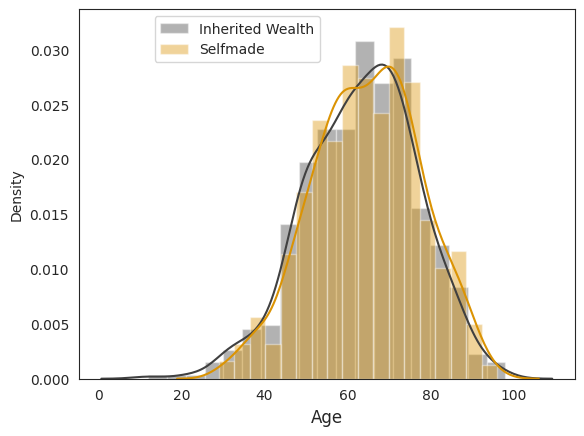

In [83]:
# Selfmade vs Inherited Advanced Countries billionaires Ages
sns.distplot(df_Advanced_inherited[['Demographicsage']], hist=True , color="#404040" ,label='Inherited Wealth')
sns.distplot(df_Advanced_selfmade[['Demographicsage']], hist=True , color="#DB9303", label='Selfmade')
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
sns.set_style("white")
plt.xlabel('Age',fontsize = 12)
plt.show()

In [84]:
df_emerging_selfmade = df_emerging[df_emerging['Wealthtype']== 'Selfmade']
df_emerging_selfmade

,Name,Rank,Year,Companyfounded,Companyname,Companyrelationship,Companysector,Companytype,Demographicsage,Demographicsgender,...,Locationgdp,Locationregion,Wealthtype,Wealthworth in billions,Wealthhowcategory,Wealthhowfromemerging,Wealthhowindustry,Wealthhowinherited,Wealthhowwasfounder,Wealthhowwaspolitical
5,Carlos Slim Helu,2,2014,1990,Telmex,Founder,Communication Services,Privatized,74,Male,...,0.000000e+00,America,Selfmade,72.0,Non-Traded Sectors,True,Media and Entertainment,not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,Founder,Real Estate,New,68,Male,...,1.600000e+11,Asia,Selfmade,12.7,Financial,True,Real Estate,not inherited,True,True
12,Tsai Wan-lin,5,1996,1962,Lin Yuan Group,Founder,Financials,New,71,Male,...,0.000000e+00,Asia,Selfmade,12.2,Financial,True,Banking and Finance,not inherited,True,True
16,Prince Alwaleed Bin Talal Alsaud,6,2001,1980,Kingdom Holding Company,Founder,Indusrials,New,44,Male,...,1.830000e+11,Africa,Selfmade,20.0,Financial,True,Banking and Finance,not inherited,True,True
19,Li Ka-shing,7,1996,1971,Cheung king,Founder,Real Estate,New,67,Male,...,1.600000e+11,Asia,Selfmade,10.6,Financial,True,Real Estate,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,Wang Yong,1565,2014,1986,Xiwang Group,Founder,Consumer Staples,New,63,Male,...,0.000000e+00,Asia,Selfmade,1.0,Traded Sectors,True,Consumer Goods,not inherited,True,True
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,Investor,Consumer Staples,New,55,Male,...,0.000000e+00,Asia,Selfmade,1.0,Traded Sectors,True,Non-Consumer Goods,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,Chairman,Real Estate,New,53,Male,...,0.000000e+00,Asia,Selfmade,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,Founder,Materials,New,53,Male,...,0.000000e+00,Europe,Selfmade,1.0,Resource Related,True,Mining,not inherited,True,True


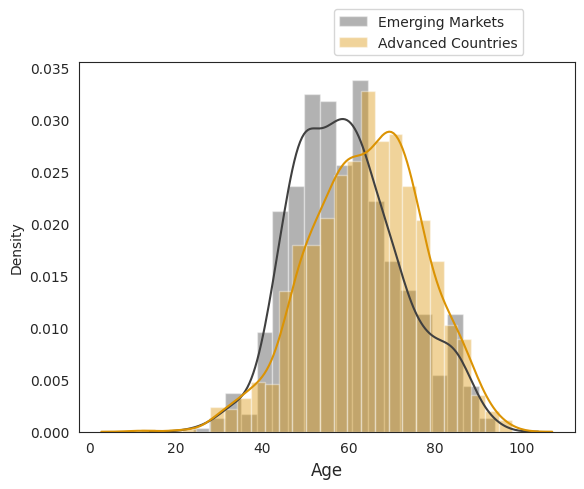

In [85]:
# Emerging Markets vs Advanced Countries Billionaires Ages
sns.distplot(df_emerging[['Demographicsage']], hist=True, color="#404040",label='Emerging Markets')
sns.distplot(df_advanced[['Demographicsage']], hist=True, color="#DB9303", label='Advanced Countries')
sns.set_style("white")
plt.xlabel('Age',fontsize = 12)
plt.legend(bbox_to_anchor=(0.5,1.0),loc = 'best')
plt.show()

Self made billioanaires from Emerging Markets are younger than inherited billionaires. While the distribution of inherited wealth billionaires is more evenly spread around the mean the distribution of selfmade billionaires is skewed towards younger billionaires.
The distribution of selfmade and inherited billionaires by age are quite similar in advanced countries

**HYPOTHESIS**

**Hypothesis 1**

**Q1**: Does Wealth inequality exists across the world?

**H0**: The distribution of billionaires and their wealth worth are equally distributed across the world.

**H1**: The high prevalence of extraordinary wealth is linked to the fundamental right to own property and use it for one's own economic gain. The distribution of Billionaires and their net worth is not equally distributed across the world.


In [86]:
# Hypothesis 1
#Anova test was done to find variance of wealth across location regions
df_anova = Billionaires[['Wealthworth in billions','Locationregion']]
grps = pd.unique(df_anova.Locationregion.values)
print(grps)
d_data = {grp:df_anova['Wealthworth in billions'][df_anova.Locationregion == grp] for grp in grps}

['America' 'Europe' 'Asia' 'Africa']


In [87]:
# Applying oneway f test
import scipy.stats as stats
F, p = stats.f_oneway(d_data['America'], d_data['Europe'], d_data['Asia'],d_data['Africa'])
# pvalue

print(p)
# Hypothesis testing

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

print("Distribution of Billionaires  and their wealth are not equally distributed")

0.003004061732067638
reject null hypothesis
Distribution of Billionaires  and their wealth are not equally distributed


**Hypothesis 2**

**Q2**: Does gender inequality exists? Do males’ preferences in the source of wealth differ from females’ preferences in the source of wealth? H0: Demographics gender is independent of the source of wealth and no gender inequality exists.

 **H1**: There is a significant association between gender and source of wealth. Gender inequality exists between sources of wealth.

In [88]:
# Hypothesis 2
# Does Gender Inequality exists?
# Chi2Square test to find  Gender and Source Of Wealth are not independent
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency

# defining the table
data3 = pd.crosstab(Billionaires['Demographicsgender'], Billionaires['Wealthtype'])
stat, p, dof, expected = chi2_contingency(data3)
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

print("Gender Inequality exists across sources of wealth")

p value is 8.565040835011972e-63
Dependent (reject H0)
Gender Inequality exists across sources of wealth


In [89]:
import plotly.express as px
data_age = Billionaires[Billionaires['Demographicsage'] !=0 ]
fig = px.bar(data_age.sort_values('Demographicsage',ascending = True)[:12], x = 'Name', template = 'plotly_dark', color = 'Companysector', opacity = 0.8, title = '<b>Top 10 youngest billionairs and the industries')
fig.show()

In [90]:
import plotly.express as px
data_age = Billionaires[Billionaires['Demographicsage'] !=0 ]
fig = px.bar(data_age.sort_values('Demographicsage',ascending = False)[:12], x = 'Name', template = 'plotly_dark', color = 'Companysector', opacity = 0.8, title = '<b>Top 10 youngest billionairs and the industries')
fig.show()

In [91]:
# WOMEN Billionaires
import plotly.express as px
data_female = Billionaires[Billionaires['Demographicsgender'] =='Female' ]
fig = px.bar(data_female.sort_values('Wealthworth in billions',ascending = False)[:12], x = 'Name', template = 'plotly_dark', color = 'Companysector', opacity = 0.8, title = '<b>Top 10 Women billionairs and the industries')
fig.show()

In [92]:
fig = px.histogram(data_age, x = 'Demographicsage', template = 'plotly_dark', color = 'Demographicsage', opacity = 0.9, title = '<b>Distribution of age in billionaires')
fig.show()

In [93]:
px.scatter(Billionaires.sort_values(by='Wealthworth in billions', ascending = False)[:15],y='Wealthworth in billions',x='Name',template='plotly_dark',size='Wealthworth in billions',color='Companysector',opacity=0.85,title='<b>Successful Industries of billionaires')

In [94]:
Billionaires['Demographicsage'].unique()

array([40, 45, 58, 65, 70, 74,  0, 48, 77, 68, 56, 83, 71, 69, 44, 78, 73,
       67, 53, 61, 55, 80, 57, 59, 52, 81, 66, 91, 43, 64, 72, 50, 51, 85,
       29, 88, 94, 86, 35, 36, 84, 39, 82, 62, 63, 76, 60, 47, 38, 49, 75,
       90, 42, 79, 46, 41, 54, 33, 87, 89, 37, 92, 30, 34, 28, 32, 31, 12,
       96, 21, 24, 93, 98, 95])

In [95]:
# sorting values by a multilevel index. ensure to name all columns of the index..
table1 = pd.pivot_table(Billionaires, index= 'Companysector', values ='Wealthworth in billions', aggfunc=['sum']).round(2)
#table1.columns
table1.sort_values(by =('sum', 'Wealthworth in billions'), ascending = False ).head(20)

,sum
,Wealthworth in billions
Companysector,
Consumer Discretionary,1896.6
Financials,1332.1
Consumer Staples,1152.8
Information Technology,1009.4
Communication Services,833.2
Indusrials,753.8
Real Estate,695.6
Materials,583.6


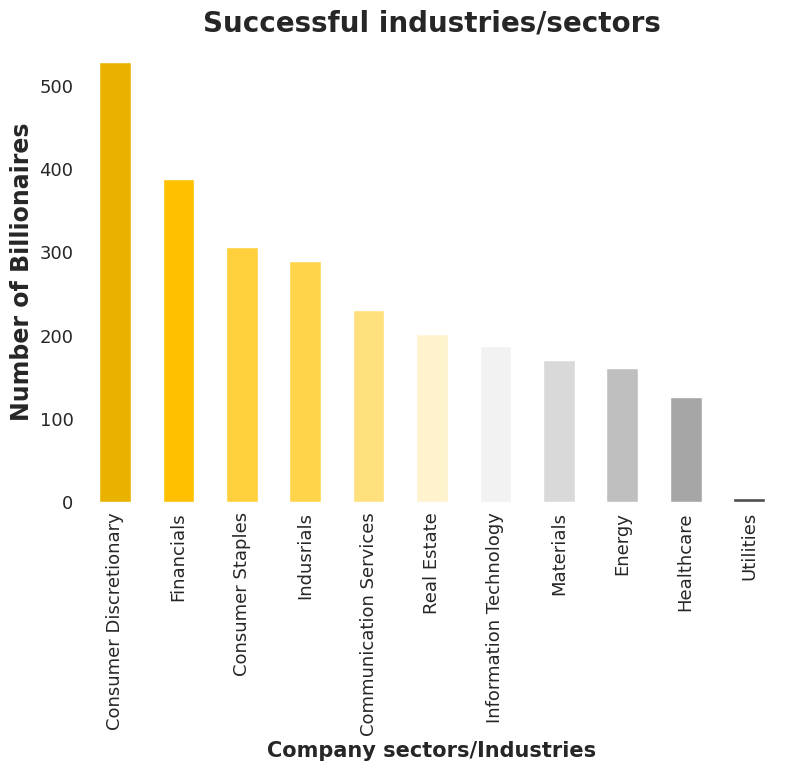

In [96]:
Billionaires['Companysector'].value_counts()[:11].plot(kind='bar', color =['#EAB200','#FFC000','#FFD03B','#FFD44B','#FFE07D','#FFF3CD','#F2F2F2','#D9D9D9','#BFBFBF','#A6A6A6', 	'#4d4d4d'],figsize=(9,6))
plt.title('The top  successful industries that produce billionaires')
sns.set_style("white")
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Company sectors/Industries',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.title('Successful industries/sectors',fontsize = 20,weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

**Hypothesis 3**


**Q3**: Are Emerging Markets Billionaires Younger than Advanced Countries Billionaires.


**H0**: Average age of Self-made Emerging Markets Billionaires and Advanced Countries Billionaires are the same.


**H1**: Self-made Emerging Markets Billionaires are younger than Advanced Countries Billionaires.


<Axes: xlabel='Demographicsage', ylabel='Density'>

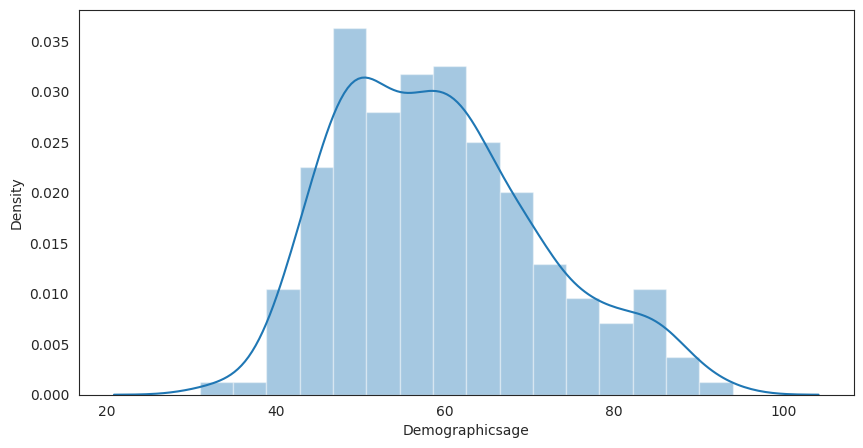

In [97]:
# Selfmade Emerging Markets
plt.figure(figsize=(10,5))
sns.distplot(df_emerging_selfmade['Demographicsage'])

[59.2, 58.54, 60.63, 59.33, 59.67, 58.6, 57.72, 59.26, 58.06, 58.67, 58.5, 60.67, 58.43, 58.86, 57.74, 59.82, 61.36, 57.93, 58.28, 58.76, 60.96, 58.5, 57.95, 61.35, 59.97, 59.45, 57.48, 57.07, 59.33, 62.64, 59.95, 60.99, 60.21, 59.45, 60.39, 59.37, 59.94, 59.41, 57.89, 58.74, 60.28, 58.99, 59.19, 59.42, 60.85, 58.55, 62.81, 60.9, 60.6, 61.06, 58.22, 62.2, 60.17, 59.98, 59.28, 60.31, 58.67, 60.14, 59.68, 58.84, 61.04, 60.23, 60.43, 60.04, 60.11, 60.48, 59.43, 59.26, 58.83, 56.78, 60.74, 58.58, 59.84, 59.62, 59.22, 58.98, 58.43, 60.48, 57.54, 60.42, 58.41, 58.87, 59.07, 59.56, 60.45, 60.0, 59.52, 58.37, 58.6, 59.73, 59.13, 59.36, 60.09, 58.38, 57.76, 58.31, 60.73, 58.88, 58.02, 61.32]


<Axes: ylabel='Density'>

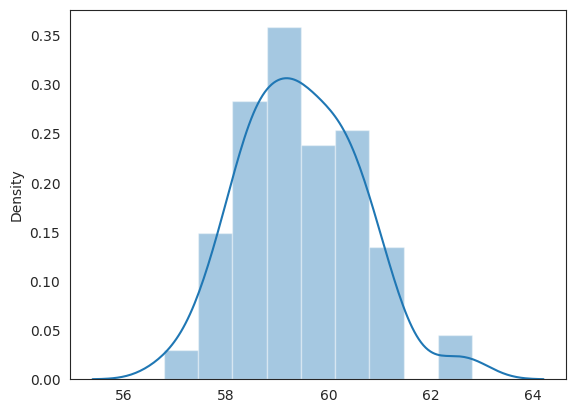

In [98]:
# Selfmade Emerging Markets
sample_list_1=[]
for i in range (100):
     sample_list_1.append(np.random.choice(df_emerging_selfmade[df_emerging_selfmade['Demographicsage'].notna()]
                                           ['Demographicsage'],100).mean())
print(sample_list_1)
sns.distplot(sample_list_1)

[64.13, 64.92, 62.57, 61.15, 66.24, 65.63, 64.37, 68.06, 64.06, 64.49, 64.0, 65.13, 64.01, 65.05, 64.95, 64.36, 64.37, 61.96, 62.96, 66.11, 62.55, 65.16, 63.1, 64.73, 65.05, 66.18, 64.62, 62.0, 65.33, 63.22, 63.78, 63.04, 65.19, 64.25, 63.57, 65.01, 64.61, 62.11, 63.17, 62.91, 64.21, 66.68, 63.02, 63.37, 63.92, 64.04, 63.26, 66.53, 63.47, 63.63, 65.47, 62.54, 64.09, 62.25, 65.61, 62.74, 64.74, 64.84, 64.31, 60.93, 63.95, 64.83, 65.38, 62.69, 63.19, 66.38, 66.97, 63.99, 65.65, 65.83, 65.25, 65.3, 64.39, 62.37, 63.86, 63.94, 64.69, 62.67, 64.62, 63.85, 60.73, 63.2, 64.39, 63.04, 63.26, 65.27, 65.35, 63.0, 63.18, 64.15, 66.18, 64.53, 66.93, 64.28, 64.57, 64.21, 63.63, 65.14, 64.4, 63.82]


<Axes: ylabel='Density'>

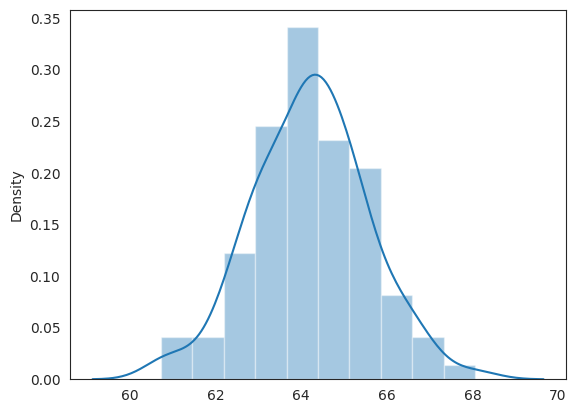

In [99]:
# Advanced Countries
sample_list_2=[]
for i in range (100):
    sample_list_2.append(np.random.choice(df_advanced[df_advanced['Demographicsage'].notna()]
                                          ['Demographicsage'],100).mean())
print(sample_list_2)
sns.distplot(sample_list_2)

In [100]:
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

#******Hypothesis definition*******
# H0 : (df_emerging_selfmade <= df_advanced)
# H1 : (df#-emerging_selfmade > df_advanced)

ztest_score,p_value=ztest(x1=sample_list_1,x2=sample_list_2,value=0,alternative='two-sided')

print('p value is : ',p_value)
print('ztest score is : ',ztest_score)

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_list_1,value=0,alpha=0.05,alternative='two-sided')
print(f'Average age of billionaires in Emerging Markets(Selfmade)  lies between {min_val} and {max_val}')

#***** 95% confidence level*****
min_val,max_val=zconfint(sample_list_2,value=0,alpha=0.05,alternative='two-sided')
print(f'Average age of billionaires in Advanced Countries lies between  {min_val} and {max_val}')


p value is :  1.40862108351945e-157
ztest score is :  -26.745082284289364
Average age of billionaires in Emerging Markets(Selfmade)  lies between 59.23446262959156 and 59.690537370408435
Average age of billionaires in Advanced Countries lies between  63.945526782927196 and 64.47067321707281


**K-PROTOTYPE CLUSTER ANALYSIS**

Attributes year, rank, company sector, wealth type, demographics age, demographics gender, company relationship, the wealth worth in billions, location region, location citizenship, wealth how the industry was used in the cluster analysis. Clustering is used to identify patterns in the wealth distribution of billionaires around the world.

In [101]:
Billionaires = Billionaires.astype({'Companysector': str})
Billionaires = Billionaires.astype({'Companyrelationship': str})
Billionaires = Billionaires.astype({'Companytype': str})
Billionaires = Billionaires.astype({'Demographicsgender': str})
Billionaires = Billionaires.astype({'Locationregion': str})
Billionaires = Billionaires.astype({'Wealthtype': str})
Billionaires = Billionaires.astype({'Locationcitizenship': str})
Billionaires = Billionaires.astype({'Wealthhowcategory': str})
Billionaires = Billionaires.astype({'Wealthhowindustry': str})
Billionaires = Billionaires.astype({'Wealthhowinherited': str})
Billionaires = Billionaires.astype({'Locationcountry code': str})
Billionaires = Billionaires.astype({'Companyname': str})
Billionaires = Billionaires.astype({'Name': str})

In [102]:
data3 = Billionaires[Billionaires['Demographicsage']!= 0]

In [103]:
# Attributes used for clustering
df = data3[['Rank','Year', 'Companyrelationship' ,'Companysector','Companytype','Demographicsage',
'Demographicsgender','Locationregion','Locationcitizenship','Wealthtype','Wealthhowindustry',
'Wealthhowcategory','Wealthworth in billions']]
df_final= df.copy()

In [104]:
from kmodes.kprototypes import KPrototypes

In [105]:
#Choosing optimal K
K = range(1,8)
cost = []
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(df_final, categorical=[2,3,4,6,7,8,9,10,11])
    cost.append(kproto.cost_)

KeyboardInterrupt: ignored

In [ ]:
# elbow method for number of clusters
plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.plot(range(1,8),cost)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Clustering
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(df_final, categorical=[2,3,4,6,7,8,9,10,11])
centroids = kproto.cluster_centroids_
labels  = kproto.labels_


Billionaires are clustered into four clusters. Distribution of wealth was highly skewed, with a small number of individuals owning a large portion of the wealth.

In [ ]:
# Merging original data with cluster
df_clusters = pd.concat([df_final, pd.DataFrame({'cluster': clusters})], axis=1)
df_clusters

In [ ]:
# Company Sector
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (10,10))
ax = sns.countplot(x=df_clusters['Companysector'],order=df_clusters['Companysector'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", weight = 'bold')
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Company sectors',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.tight_layout()
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)


In [ ]:
# Company Relationship
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (10,10))
ax = sns.countplot(x=df_clusters['Companyrelationship'],order=df_clusters['Companyrelationship'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Company Relationship',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Location Region
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (4,10))
ax = sns.countplot(x=df_clusters['Locationregion'],order=df_clusters['Locationregion'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" ,  weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Location Region',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Year
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (4,10))
ax = sns.countplot(x=df_clusters['Year'],order=df_clusters['Year'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" ,  weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Year',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Location Citizenship
plt.subplots(figsize = (3,10))
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
ax= sns.countplot(x=df_clusters['Locationcitizenship'],order=df_clusters['Locationcitizenship'].value_counts().index, palette = colors_list,hue=df_clusters['cluster'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=91, ha="right" , weight = 'bold')
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.tight_layout()
plt.xlabel('Location Citizenship',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Wealth type
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (3,10))
ax = sns.countplot(x=df_clusters['Wealthtype'],order=df_clusters['Wealthtype'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" , weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('WealthType',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Company Type
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (6,10))
ax = sns.countplot(x=df_clusters['Companytype'],order=df_clusters['Companytype'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" , weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Company Type',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Wealth Category
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
#plt.figure(figsize=(8,2), dpi=100)
plt.subplots(figsize = (8,10))
ax = sns.countplot(x=df_clusters['Wealthhowcategory'],order=df_clusters['Wealthhowcategory'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" , weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.xlabel('Wealth How Category',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
# Demographics Gender
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (3,10))
ax = sns.countplot(x=df_clusters['Demographicsgender'],order=df_clusters['Demographicsgender'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right" , weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.95,1.0),loc = 'best')
plt.xlabel('Demographics Gender',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)

In [ ]:
fig = px.scatter(df_clusters, x="Rank", y="Wealthworth in billions", color='cluster')
fig.show()

In [ ]:
# Wealth Industry
colors_list = ['#FFC000' ,'#00B050', '#2F75B5' ,'#FF0000']
plt.subplots(figsize = (10,10))
ax = sns.countplot(x=df_clusters['Wealthhowindustry'],order=df_clusters['Wealthhowindustry'].value_counts().index, palette = colors_list, hue=df_clusters['cluster'])
sns.set_style("white")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", weight = 'bold')
plt.xlabel('Wealth How Industry',fontsize = 15,weight = 'bold')
plt.ylabel('Number of Billionaires',fontsize = 17, weight = 'bold')
plt.tight_layout()
ax.legend(df_clusters.index,bbox_to_anchor=(0.91,1.0),loc = 'best')
plt.axis('on')
plt.grid(False) #to remove the gride lines
sns.despine(left = True , bottom = True)
